### Import useful libraries

In [2]:
import numpy as np
import scipy.stats as st
import scipy.signal as signal
import matplotlib.pyplot as plt
import random

## (i) Probability distributions

Use *scipy.stats* module to work on different probability distributions. Use documentation [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

#### 1. Bernoulli - an example of discrete distribution

In [17]:
dist_bernoulli = st.bernoulli
p = st.uniform.rvs(loc=0, scale=1)
x = dist_bernoulli.rvs(p, size=1000)

xs = np.array([0, 1])
pmf_bernoulli = dist_bernoulli.pmf(xs, p)

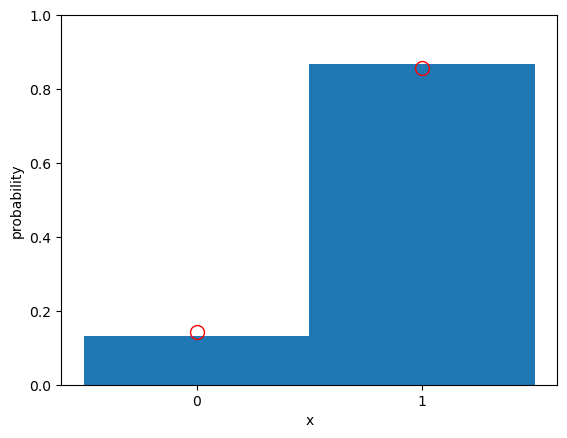

In [20]:
plt.figure()

plt.hist(x, bins=xs.size, range=(xs[0]-.5, xs[-1]+.5), density=True) 


plt.plot(xs, pmf_bernoulli, 'ro', markersize=10, markerfacecolor='None')

plt.xticks(xs)
plt.ylim([0, 1])
plt.xlabel('x')
plt.ylabel('probability')
plt.show()

#### 2. Gaussian - an example of continuous distribution

In [21]:
dist_norm = st.norm
mu = np.random.uniform(-100, 100)
sigma = np.random.uniform(0.5, 6)
mu, sigma = 3, 2
x = dist_norm.rvs(loc=mu, scale=sigma, size=5000)

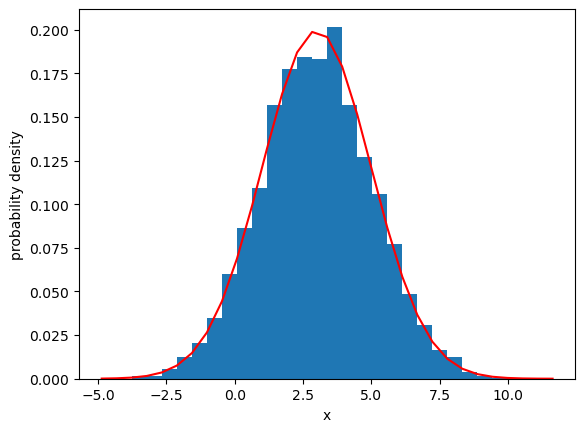

In [24]:
plt.figure()

_ , xs, _ = plt.hist(x, bins=30, density=True)


pdf_norm = dist_norm.pdf(xs, loc=mu, scale=sigma)
plt.plot(xs, pdf_norm, 'r')

plt.xlabel('x')
plt.ylabel('probability density')
plt.show()

## (ii) Time series of noise

What is [Colored noise](https://en.wikipedia.org/wiki/Colors_of_noise)?

Specify properties of the time series

In [25]:
fs = 1000
N = np.random.randint(1, 2000)
t = np.arange(N) / fs * 1000

#### White noise

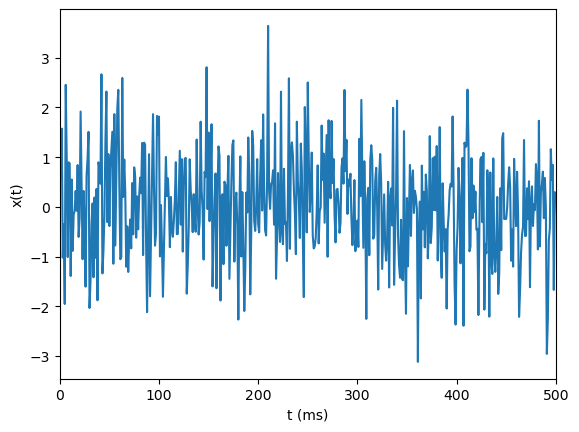

In [26]:
white_noise = dist_norm.rvs(size=N)

plt.figure()
plt.plot(t, white_noise)
plt.xlim([0, 500])
plt.xlabel('t (ms)')
plt.ylabel('x(t)')
plt.show()

#### Brownian noise (random walk)

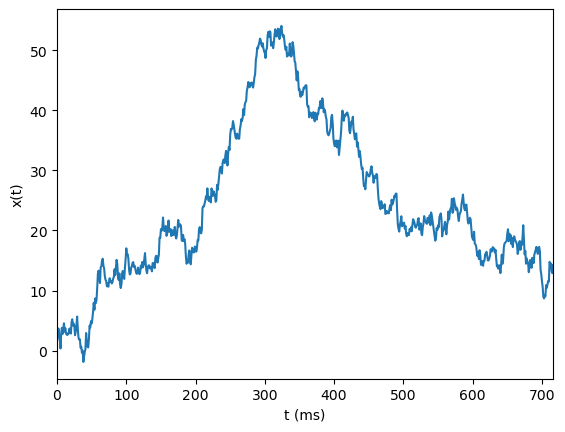

In [27]:
brownian_noise = np.cumsum(white_noise)

plt.figure()
plt.plot(t, brownian_noise)
plt.xlim(t[[0, -1]])
plt.xlabel('t (ms)')
plt.ylabel('x(t)')
plt.show()

#### Pink noise

In [14]:
%pip install colorednoise

Note: you may need to restart the kernel to use updated packages.


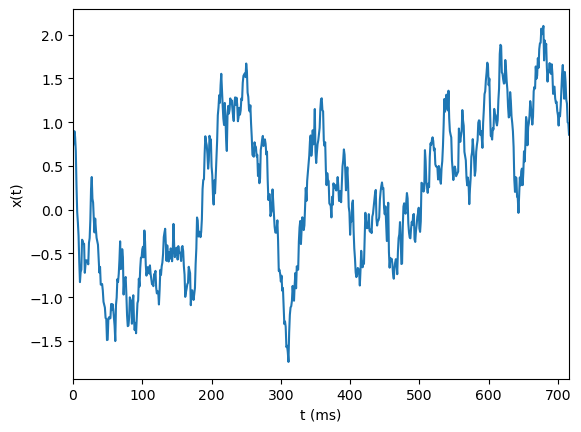

In [28]:
import colorednoise as cn
beta = np.random.normal(.01, 1.99)
pink_noise = cn.powerlaw_psd_gaussian(beta, N)

plt.figure()
plt.plot(t, pink_noise)
plt.xlim(t[[0, -1]])
plt.xlabel('t (ms)')
plt.ylabel('x(t)')
plt.show()

## (iii) Power spectral density (PSD)

Use *scipy.signal.periodogram* and *scipy.signal.welch* to estimate PSD. Use documentation [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html).

White noise has constant power spectrum. Brownian noise has $1/f^2$ PSD. Pink noise has $1/f^\beta$ PSD, $0<\beta<2$.

#### Using pink noise for example

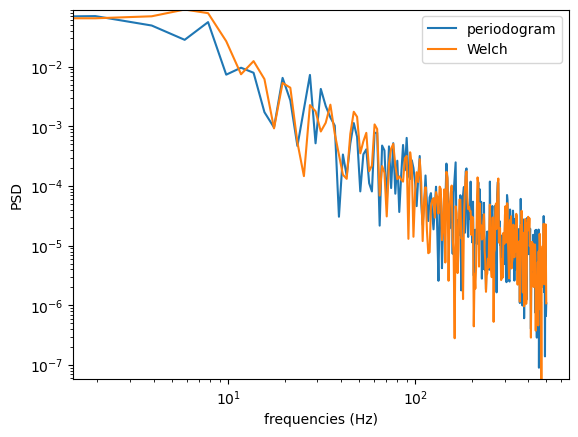

In [29]:

nperseg = np.random.choice([256, 512, 1024, 2048, 4096])

f1, pxx1 = signal.periodogram(pink_noise, fs=fs, nfft=nperseg)

f2, pxx2 = signal.welch(pink_noise, fs=fs, nperseg=nperseg)

plt.figure()
plt.plot(f1, pxx1, label='periodogram')
plt.plot(f2, pxx2, label='Welch')
plt.xlabel('frequencies (Hz)')
plt.ylabel('PSD')

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.ylim([pxx2.min(),pxx2.max()])

plt.legend()
plt.show()